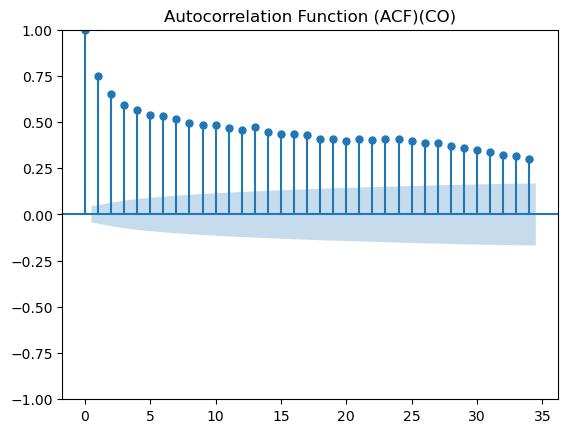

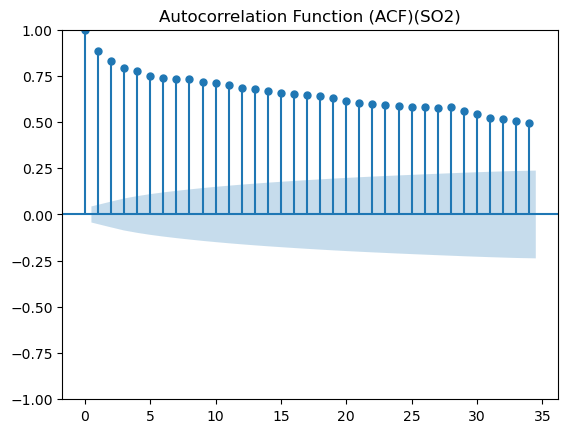

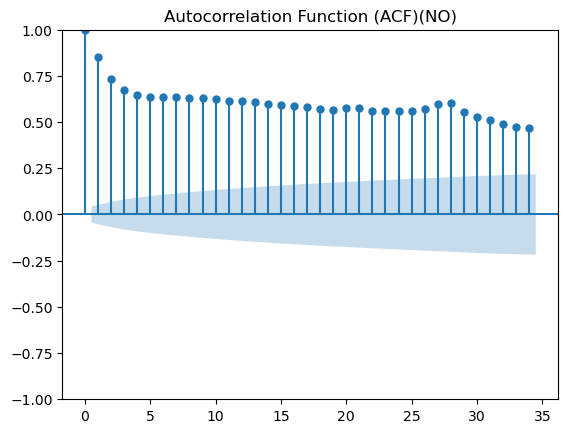

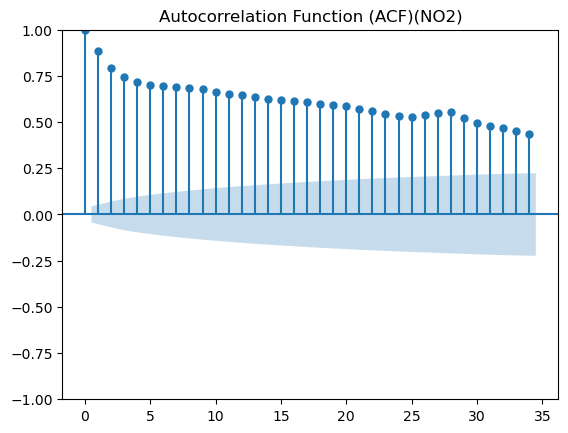

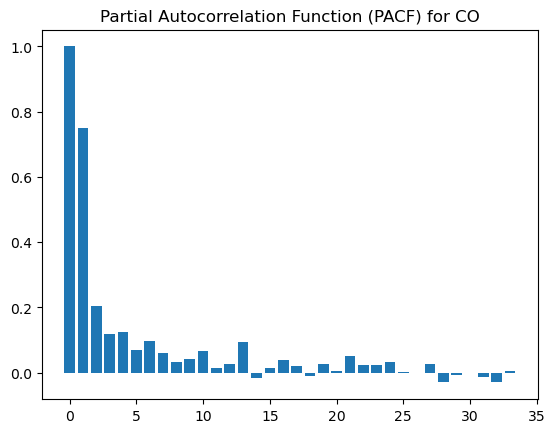

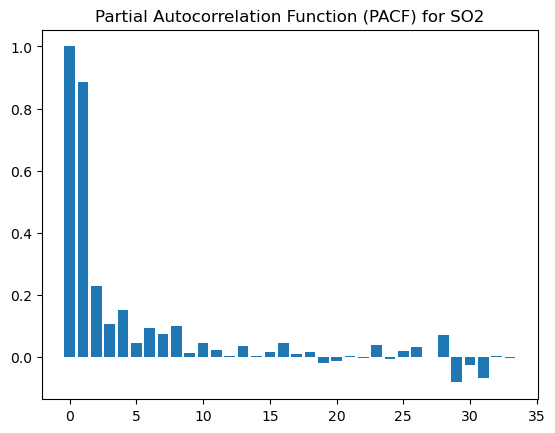

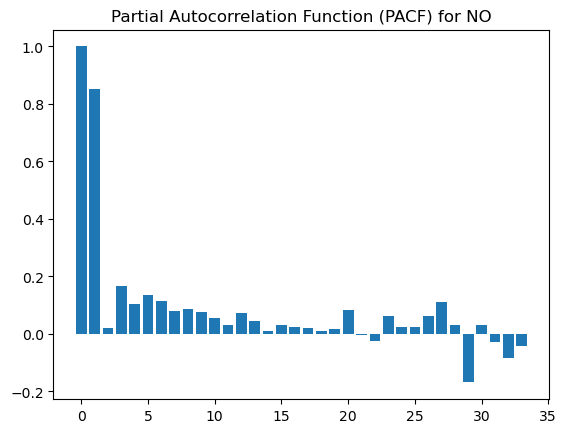

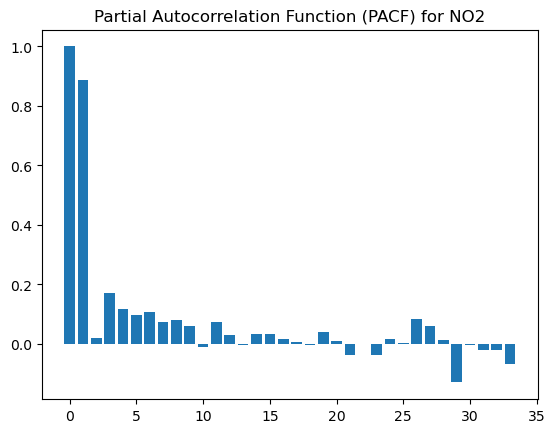

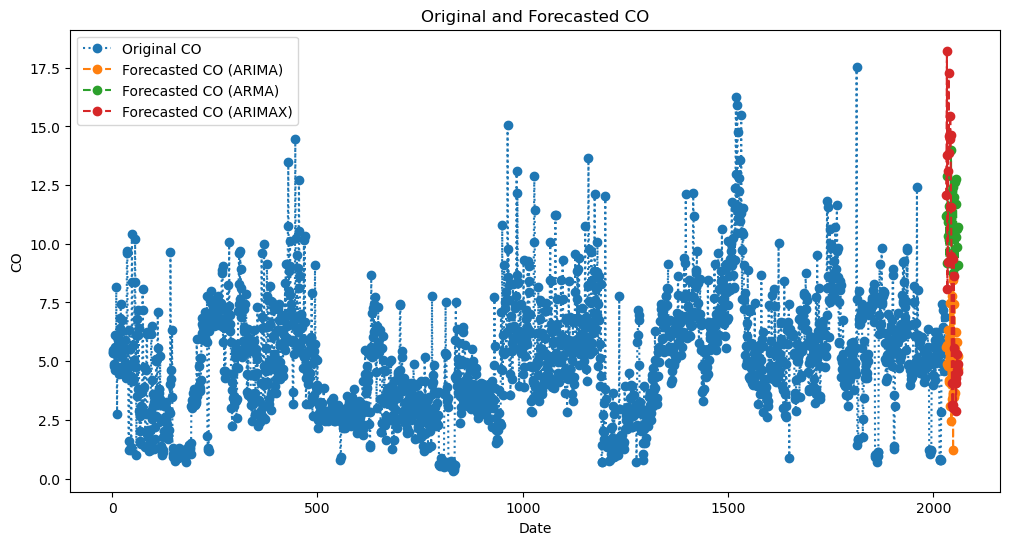

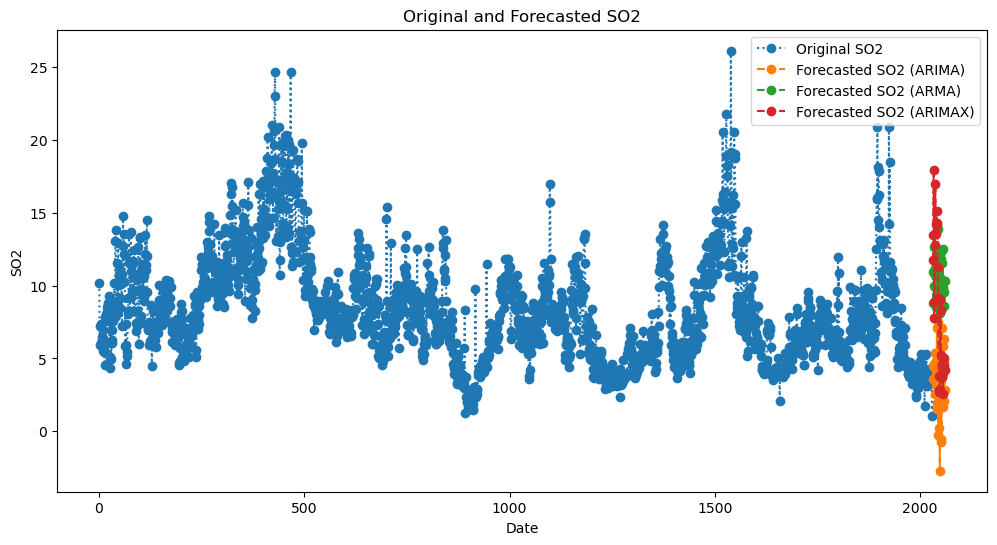

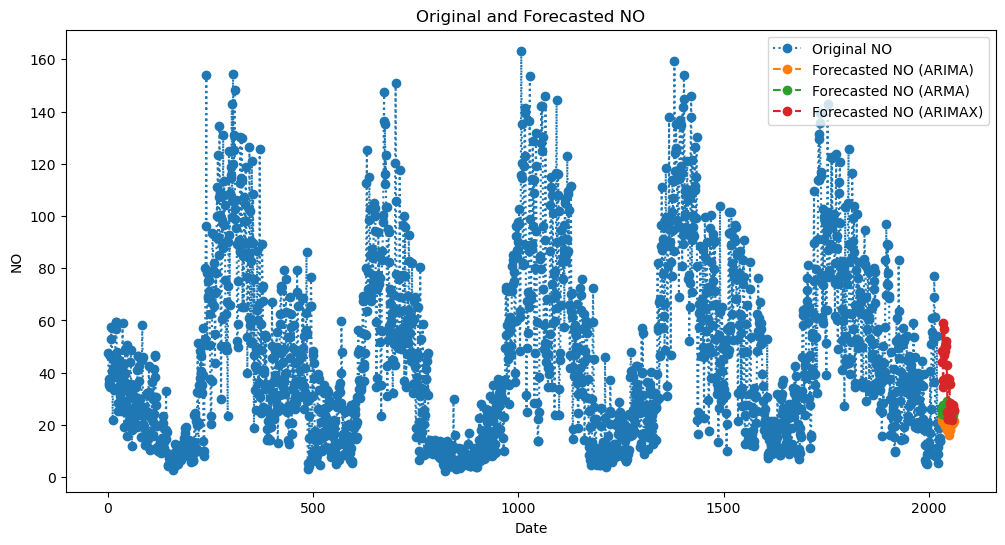

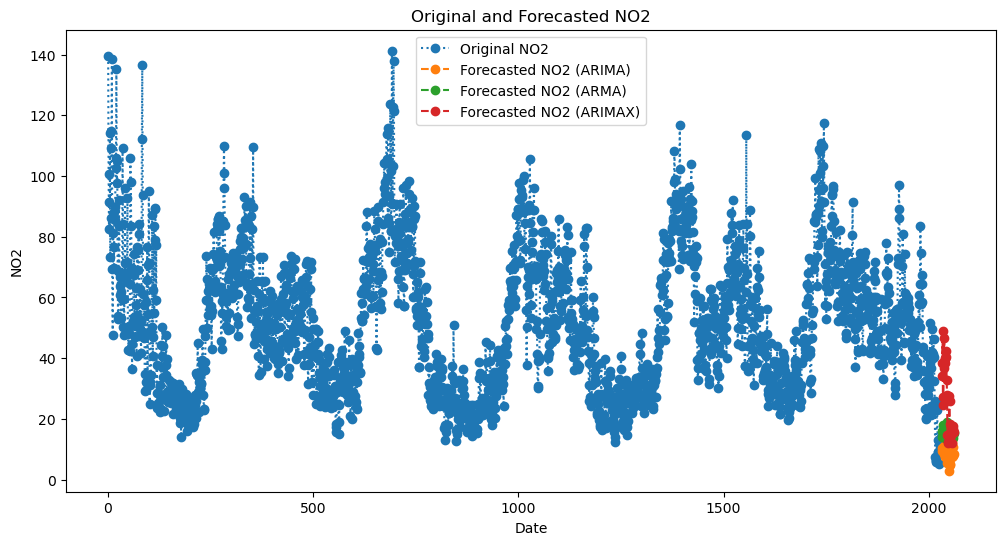

In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf

# Function to calculate the forecasted temperature for the next day using SARIMA
def calculate_forecasted_temperature_sarima(y_today, avg_p1_today, avg_p2_today, phi_1, beta_1, beta_2, c, seasonal_coefficients):
    # Forecasted temperature for the next day
    seasonal_order = len(seasonal_coefficients)
    seasonal_component = sum(seasonal_coefficients * y_today[-seasonal_order:])
    y_next_day = c + phi_1 * y_today[-1] + beta_1 * avg_p1_today + beta_2 * avg_p2_today + seasonal_component
    return y_next_day

# Function to calculate the forecasted temperature for the next day using ARIMA
def calculate_forecasted_temperature_arima(y_today, phi_1, theta_1, diff_y_today, error_today, c):
    y_next_day = c + phi_1 * diff_y_today + theta_1 * error_today
    return y_next_day

# Function to calculate the forecasted temperature for the next day using ARIMAX
def calculate_forecasted_temperature_arimax(y_today, avg_p1_today, avg_p2_today, phi_1, beta_1, beta_2, c):
    # Forecasted temperature for the next day
    y_next_day = c + phi_1 * y_today + beta_1 * avg_p1_today + beta_2 * avg_p2_today
    return y_next_day

# Function to calculate the forecasted temperature for the next day using ARMA
def calculate_forecasted_temperature_arma(y_today_arma, phi_1, theta_1, error_today, error_next_day, c):
    # Forecasted temperature for the next day
    y_next_day_arma = c + phi_1 * y_today_arma + theta_1 * error_today + error_next_day
    return y_next_day_arma



# Read data from CSV
data = pd.read_csv('Delhi_Pollution.csv')  # Update with your CSV filename

# Extract relevant columns
dates =[i for i in range (1,2061)]
NO = data['NO']
NO2 = data['NO2']
CO = data['CO']
SO2 = data['SO2']

# Plot ACF for CO
plot_acf(CO)
plt.title('Autocorrelation Function (ACF)(CO)')
plt.show()

# Plot ACF for SO2
plot_acf(SO2)
plt.title('Autocorrelation Function (ACF)(SO2)')
plt.show()

# Plot ACF for NO
plot_acf(NO)
plt.title('Autocorrelation Function (ACF)(NO)')
plt.show()

# Plot ACF for NO2
plot_acf(NO2)
plt.title('Autocorrelation Function (ACF)(NO2)')
plt.show()

# Calculate and plot PACF for CO
pacf_values_co = pacf(CO)
plt.bar(np.arange(len(pacf_values_co)), pacf_values_co)
plt.title('Partial Autocorrelation Function (PACF) for CO')
plt.show()

# Calculate and plot PACF for SO2
pacf_values_so2 = pacf(SO2)
plt.bar(np.arange(len(pacf_values_so2)), pacf_values_so2)
plt.title('Partial Autocorrelation Function (PACF) for SO2')
plt.show()

# Calculate and plot PACF for NO
pacf_values_no = pacf(NO)
plt.bar(np.arange(len(pacf_values_no)), pacf_values_no)
plt.title('Partial Autocorrelation Function (PACF) for NO')
plt.show()

# Calculate and plot PACF for NO2
pacf_values_no2 = pacf(NO2)
plt.bar(np.arange(len(pacf_values_no2)), pacf_values_no2)
plt.title('Partial Autocorrelation Function (PACF) for NO2')
plt.show()


# Extract relevant columns for CO
phi_1_CO = np.corrcoef(CO[:-1], CO[1:])[0, 1]
beta_1_CO = np.corrcoef(CO, SO2)[0, 1]
beta_2_CO = np.corrcoef(CO, SO2)[0, 1]
theta_1_CO = np.corrcoef(CO[:-1], CO[1:])[0, 1]

# Extract relevant columns for SO2
phi_1_SO2 = np.corrcoef(SO2[:-1], SO2[1:])[0, 1]
beta_1_SO2 = np.corrcoef(SO2, CO)[0, 1]
beta_2_SO2 = np.corrcoef(SO2, CO)[0, 1]
theta_1_SO2 = np.corrcoef(SO2[:-1], SO2[1:])[0, 1]

# Extract relevant columns for NO
phi_1_NO = np.corrcoef(NO[:-1], NO[1:])[0, 1]
beta_1_NO = np.corrcoef(NO, NO2)[0, 1]
beta_2_NO = np.corrcoef(NO, NO2)[0, 1]
theta_1_NO = np.corrcoef(NO[:-1], NO[1:])[0, 1]

# Extract relevant columns for NO2
phi_1_NO2 = np.corrcoef(NO2[:-1], NO2[1:])[0, 1]
beta_1_NO2 = np.corrcoef(NO2, NO)[0, 1]
beta_2_NO2 = np.corrcoef(NO2, NO)[0, 1]
theta_1_NO2 = np.corrcoef(NO2[:-1], NO2[1:])[0, 1]
'''
# Last observed CO values
y_today_sarima_CO = CO.values[-30:]  # Use the last 30 days for seasonal component

# Last observed SO2 values
y_today_sarima_SO2 = SO2.values[-30:]  # Use the last 30 days for seasonal component

# Last observed NO values
y_today_sarima_NO = NO.values[-30:]  # Use the last 30 days for seasonal component

# Last observed NO2 values
y_today_sarima_NO2 = NO2.values[-30:]  # Use the last 30 days for seasonal component'''

# Seasonal coefficients (taking the last 30 values for simplicity)
possible_values = [0.1, 0.2, 0.3, 0.4]
random_values = [random.choice(possible_values) for _ in range(30)]
seasonal_coefficients = np.array(random_values)


# Last observed CO values
avg_CO = CO.values[-30:]  # Use the last 30 days for seasonal component

# Last observed SO2 values
avg_SO2 = SO2.values[-30:]  # Use the last 30 days for seasonal component

# Last observed NO values
avg_NO = NO.values[-30:]  # Use the last 30 days for seasonal component

# Last observed NO2 values
avg_NO2 = NO2.values[-30:]  # Use the last 30 days for seasonal component 


# Last observed CO value
y_today_arimax_CO = CO.iloc[-1]
y_today_arima_CO = CO.iloc[-1]
y_today_arma_CO = CO.iloc[-1]

# Last observed SO2 value
y_today_arimax_SO2 = SO2.iloc[-1]
y_today_arima_SO2 = SO2.iloc[-1]
y_today_arma_SO2 = SO2.iloc[-1]

# Last observed NO value
y_today_arimax_NO = NO.iloc[-1]
y_today_arima_NO = NO.iloc[-1]
y_today_arma_NO = NO.iloc[-1]

# Last observed NO2 value
y_today_arimax_NO2 = NO2.iloc[-1]
y_today_arima_NO2 = NO2.iloc[-1]
y_today_arma_NO2 = NO2.iloc[-1]


# C (intercept)
c_arimax = -4
c_arma = 7
c_arima_CO = y_today_arima_CO
c_arima_SO2 = y_today_arima_SO2
c_arima_NO = y_today_arima_NO
c_arima_NO2 = y_today_arima_NO2
#c_sarima = -60

forecasted_CO_arimax = []
forecasted_CO_arima = []
forecasted_CO_arma = []
forecasted_CO_sarima = []

forecasted_SO2_arimax = []
forecasted_SO2_arima = []
forecasted_SO2_arma = []
forecasted_SO2_sarima = []

forecasted_NO_arimax = []
forecasted_NO_arima = []
forecasted_NO_arma = []
forecasted_NO_sarima = []

forecasted_NO2_arimax = []
forecasted_NO2_arima = []
forecasted_NO2_arma = []
forecasted_NO2_sarima = []

for i in range(30):
    # Forecast CO for the next day using ARIMAX
    y_next_day_arimax_CO = calculate_forecasted_temperature_arimax(y_today_arimax_CO, avg_SO2[i], avg_NO2[i], phi_1_CO, beta_1_CO, beta_2_CO, c_arimax)
    forecasted_CO_arimax.append(y_next_day_arimax_CO)

    # Forecast SO2 for the next day using ARIMAX
    y_next_day_arimax_SO2 = calculate_forecasted_temperature_arimax(y_today_arimax_SO2, avg_SO2[i], avg_NO2[i], phi_1_SO2, beta_1_SO2, beta_2_SO2, c_arimax)
    forecasted_SO2_arimax.append(y_next_day_arimax_SO2)

    # Forecast NO for the next day using ARIMAX
    y_next_day_arimax_NO = calculate_forecasted_temperature_arimax(y_today_arimax_NO, avg_SO2[i], avg_NO2[i], phi_1_NO, beta_1_NO, beta_2_NO, c_arimax)
    forecasted_NO_arimax.append(y_next_day_arimax_NO)

    # Forecast NO2 for the next day using ARIMAX
    y_next_day_arimax_NO2 = calculate_forecasted_temperature_arimax(y_today_arimax_NO2, avg_SO2[i], avg_NO2[i], phi_1_NO2, beta_1_NO2, beta_2_NO2, c_arimax)
    forecasted_NO2_arimax.append(y_next_day_arimax_NO2)

    error_today = np.random.normal(0, 1)
    
    # Forecast CO for the next day using ARIMA
    diff_y_today_CO = y_today_arima_CO - forecasted_CO_arima[-1] if i > 0 else 0  # Simple differencing
    y_next_day_arima_CO = calculate_forecasted_temperature_arima(y_today_arima_CO, phi_1_CO, theta_1_CO, diff_y_today_CO, error_today, c_arima_CO)
    forecasted_CO_arima.append(y_next_day_arima_CO)

    # Forecast SO2 for the next day using ARIMA
    diff_y_today_SO2 = y_today_arima_SO2 - forecasted_SO2_arima[-1] if i > 0 else 0  # Simple differencing
    y_next_day_arima_SO2 = calculate_forecasted_temperature_arima(y_today_arima_SO2, phi_1_SO2, theta_1_SO2, diff_y_today_SO2, error_today, c_arima_SO2)
    forecasted_SO2_arima.append(y_next_day_arima_SO2)

    # Forecast NO for the next day using ARIMA
    diff_y_today_NO = y_today_arima_NO - forecasted_NO_arima[-1] if i > 0 else 0  # Simple differencing
    y_next_day_arima_NO = calculate_forecasted_temperature_arima(y_today_arima_NO, phi_1_NO, theta_1_NO, diff_y_today_NO, error_today, c_arima_NO)
    forecasted_NO_arima.append(y_next_day_arima_NO)

    # Forecast NO2 for the next day using ARIMA
    diff_y_today_NO2 = y_today_arima_NO2 - forecasted_NO2_arima[-1] if i > 0 else 0  # Simple differencing
    y_next_day_arima_NO2 = calculate_forecasted_temperature_arima(y_today_arima_NO2, phi_1_NO2, theta_1_NO2, diff_y_today_NO2, error_today, c_arima_NO2)
    forecasted_NO2_arima.append(y_next_day_arima_NO2)

    
    error_next_day = np.random.normal(0, 1)
    # Forecast CO for the next day using ARMA
    y_next_day_arma_CO = calculate_forecasted_temperature_arma(y_today_arma_CO, phi_1_CO, theta_1_CO, error_today, error_next_day, c_arma)
    forecasted_CO_arma.append(y_next_day_arma_CO)

    # Forecast SO2 for the next day using ARMA
    y_next_day_arma_SO2 = calculate_forecasted_temperature_arma(y_today_arma_SO2, phi_1_SO2, theta_1_SO2, error_today, error_next_day, c_arma)
    forecasted_SO2_arma.append(y_next_day_arma_SO2)

    # Forecast NO for the next day using ARMA
    y_next_day_arma_NO = calculate_forecasted_temperature_arma(y_today_arma_NO, phi_1_NO, theta_1_NO, error_today, error_next_day, c_arma)
    forecasted_NO_arma.append(y_next_day_arma_NO)

    # Forecast NO2 for the next day using ARMA
    y_next_day_arma_NO2 = calculate_forecasted_temperature_arma(y_today_arma_NO2, phi_1_NO2, theta_1_NO2, error_today, error_next_day, c_arma)
    forecasted_NO2_arma.append(y_next_day_arma_NO2)

'''    # Forecast CO for the next day using SARIMA
    y_next_day_sarima_CO = calculate_forecasted_temperature_sarima(y_today_sarima_CO, avg_SO2[i], avg_NO2[i], phi_1_CO, beta_1_CO, beta_2_CO, c_sarima, seasonal_coefficients)
    forecasted_CO_sarima.append(y_next_day_sarima_CO)
    y_today_sarima_CO = np.append(y_today_sarima_CO[1:], y_next_day_sarima_CO)

    # Forecast SO2 for the next day using SARIMA
    y_next_day_sarima_SO2 = calculate_forecasted_temperature_sarima(y_today_sarima_SO2, avg_SO2[i], avg_NO2[i], phi_1_SO2, beta_1_SO2, beta_2_SO2, c_sarima, seasonal_coefficients)
    forecasted_SO2_sarima.append(y_next_day_sarima_SO2)
    y_today_sarima_SO2 = np.append(y_today_sarima_SO2[1:], y_next_day_sarima_SO2)

    # Forecast NO for the next day using SARIMA
    y_next_day_sarima_NO = calculate_forecasted_temperature_sarima(y_today_sarima_NO, avg_SO2[i], avg_NO2[i], phi_1_NO, beta_1_NO, beta_2_NO, c_sarima, seasonal_coefficients)
    forecasted_NO_sarima.append(y_next_day_sarima_NO)
    y_today_sarima_NO = np.append(y_today_sarima_NO[1:], y_next_day_sarima_NO)

    # Forecast NO2 for the next day using SARIMA
    y_next_day_sarima_NO2 = calculate_forecasted_temperature_sarima(y_today_sarima_NO2, avg_SO2[i], avg_NO2[i], phi_1_NO2, beta_1_NO2, beta_2_NO2, c_sarima, seasonal_coefficients)
    forecasted_NO2_sarima.append(y_next_day_sarima_NO2)
    y_today_sarima_NO2 = np.append(y_today_sarima_NO2[1:], y_next_day_sarima_NO2)'''

forecasted_CO_arimax_pd = pd.Series(forecasted_CO_arimax)
forecasted_CO_arima_pd = pd.Series(forecasted_CO_arima)
forecasted_CO_arma_pd = pd.Series(forecasted_CO_arma)
#forecasted_CO_sarima_pd = pd.Series(forecasted_CO_sarima)

forecasted_SO2_arimax_pd = pd.Series(forecasted_SO2_arimax)
forecasted_SO2_arima_pd = pd.Series(forecasted_SO2_arima)
forecasted_SO2_arma_pd = pd.Series(forecasted_SO2_arma)
#forecasted_SO2_sarima_pd = pd.Series(forecasted_SO2_sarima)

forecasted_NO_arimax_pd = pd.Series(forecasted_NO_arimax)
forecasted_NO_arima_pd = pd.Series(forecasted_NO_arima)
forecasted_NO_arma_pd = pd.Series(forecasted_NO_arma)
#forecasted_NO_sarima_pd = pd.Series(forecasted_NO_sarima)

forecasted_NO2_arimax_pd = pd.Series(forecasted_NO2_arimax)
forecasted_NO2_arima_pd = pd.Series(forecasted_NO2_arima)
forecasted_NO2_arma_pd = pd.Series(forecasted_NO2_arma)
#forecasted_NO2_sarima_pd = pd.Series(forecasted_NO2_sarima)


plt.figure(figsize=(12, 6))
plt.plot(dates[:len(CO)], CO, marker='o', linestyle='dotted', label='Original CO')
plt.plot(dates[len(CO):len(CO)+30], forecasted_CO_arima_pd, marker='o', linestyle='dashed', label='Forecasted CO (ARIMA)')
plt.plot(dates[len(CO):len(CO)+30], forecasted_CO_arma_pd, marker='o', linestyle='dashed', label='Forecasted CO (ARMA)')
plt.plot(dates[len(CO):len(CO)+30], forecasted_CO_arimax_pd, marker='o', linestyle='dashed', label='Forecasted CO (ARIMAX)')
#plt.plot(dates[len(CO):len(CO)+30], forecasted_CO_sarima_pd, marker='o', linestyle='dashed', label='Forecasted CO (SARIMA)')
plt.xlabel('Date')
plt.ylabel('CO')
plt.title('Original and Forecasted CO')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dates[:len(SO2)], SO2, marker='o', linestyle='dotted', label='Original SO2')
plt.plot(dates[len(SO2):len(SO2)+30], forecasted_SO2_arima_pd, marker='o', linestyle='dashed', label='Forecasted SO2 (ARIMA)')
plt.plot(dates[len(SO2):len(SO2)+30], forecasted_SO2_arma_pd, marker='o', linestyle='dashed', label='Forecasted SO2 (ARMA)')
plt.plot(dates[len(SO2):len(SO2)+30], forecasted_SO2_arimax_pd, marker='o', linestyle='dashed', label='Forecasted SO2 (ARIMAX)')
#plt.plot(dates[len(SO2):len(SO2)+30], forecasted_SO2_sarima_pd, marker='o', linestyle='dashed', label='Forecasted SO2 (SARIMA)')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.title('Original and Forecasted SO2')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dates[:len(NO)], NO, marker='o', linestyle='dotted', label='Original NO')
plt.plot(dates[len(NO):len(NO)+30], forecasted_NO_arima_pd, marker='o', linestyle='dashed', label='Forecasted NO (ARIMA)')
plt.plot(dates[len(NO):len(NO)+30], forecasted_NO_arma_pd, marker='o', linestyle='dashed', label='Forecasted NO (ARMA)')
plt.plot(dates[len(NO):len(NO)+30], forecasted_NO_arimax_pd, marker='o', linestyle='dashed', label='Forecasted NO (ARIMAX)')
#plt.plot(dates[len(NO):len(NO)+30], forecasted_NO_sarima_pd, marker='o', linestyle='dashed', label='Forecasted NO (SARIMA)')
plt.xlabel('Date')
plt.ylabel('NO')
plt.title('Original and Forecasted NO')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dates[:len(NO2)], NO2, marker='o', linestyle='dotted', label='Original NO2')
plt.plot(dates[len(NO2):len(NO2)+30], forecasted_NO2_arima_pd, marker='o', linestyle='dashed', label='Forecasted NO2 (ARIMA)')
plt.plot(dates[len(NO2):len(NO2)+30], forecasted_NO2_arma_pd, marker='o', linestyle='dashed', label='Forecasted NO2 (ARMA)')
plt.plot(dates[len(NO2):len(NO2)+30], forecasted_NO2_arimax_pd, marker='o', linestyle='dashed', label='Forecasted NO2 (ARIMAX)')
#plt.plot(dates[len(NO2):len(NO2)+30], forecasted_NO2_sarima_pd, marker='o', linestyle='dashed', label='Forecasted NO2 (SARIMA)')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.title('Original and Forecasted NO2')
plt.legend()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ARMA

# Read data from CSV
data = pd.read_csv('Delhi_Pollution.csv')

# Extract relevant columns
dates = [i for i in range(1, 2061)]
CO = data['CO']
NO2 = data['NO2']
SO2 = data['SO2']
NO = data['NO']

# Split data into train (75%) and test (25%)
train_size = int(len(CO) * 0.75)
train_CO, test_CO = CO[:train_size], CO[train_size:]
train_SO2, test_SO2 = SO2[:train_size], SO2[train_size:]
train_NO, test_NO = NO[:train_size], NO[train_size:]
train_NO2, test_NO2 = NO2[:train_size], NO2[train_size:]

# ARMA Model for CO
arma_model_CO = ARMA(train_CO, order=(1, 1))
arma_model_CO_fit = arma_model_CO.fit(disp=False)
arma_forecast_CO = arma_model_CO_fit.forecast(steps=len(test_CO))[0]

# ARIMA Model for CO
arima_model_CO = ARIMA(train_CO, order=(1, 1, 1))
arima_model_CO_fit = arima_model_CO.fit()
arima_forecast_CO = arima_model_CO_fit.forecast(steps=len(test_CO))

# SARIMA Model for CO
sarima_model_CO = SARIMAX(train_CO, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_CO_fit = sarima_model_CO.fit(disp=False)
sarima_forecast_CO = sarima_model_CO_fit.forecast(steps=len(test_CO))

# ARIMAX Model for CO (using SO2 as exogenous variable)
arimax_model_CO = SARIMAX(train_CO, order=(1, 1, 1), exog=train_SO2)
arimax_model_CO_fit = arimax_model_CO.fit(disp=False)
arimax_forecast_CO = arimax_model_CO_fit.forecast(steps=len(test_CO), exog=test_SO2)

# Plot results for CO
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(CO)], CO, marker='o', linestyle='dotted', label='Original CO')
plt.plot(dates[train_size:len(CO)], arima_forecast_CO, marker='o', linestyle='dashed', label='Forecasted CO (ARIMA)')
plt.plot(dates[train_size:len(CO)], arma_forecast_CO, marker='o', linestyle='dashed', label='Forecasted CO (ARMA)')
plt.plot(dates[train_size:len(CO)], sarima_forecast_CO, marker='o', linestyle='dashed', label='Forecasted CO (SARIMA)')
plt.plot(dates[train_size:len(CO)], arimax_forecast_CO, marker='o', linestyle='dashed', label='Forecasted CO (ARIMAX)')
plt.xlabel('Date')
plt.ylabel('CO')
plt.title('Original and Forecasted CO')
plt.legend()
plt.show()

# Repeat the above process for NO, SO2, and NO2
# You can apply similar steps as above for NO, SO2, and NO2, changing the column and variable names accordingly.


ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.api' (c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\api.py)